# Paris Housing

https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification

## Dataset

* squareMeters
* numberOfRooms
* hasYard
* hasPool
* floors - number of floors
* cityCode - zip code
* cityPartRange - the higher the range, the more exclusive the neighbourhood is
* numPrevOwners - number of previous owners
* made - year
* isNewBuilt
* hasStormProtector
* basement - basement square meters
* attic - attic square meteres
* garage - garage size
* hasStorageRoom
* hasGuestRoom - number of guest rooms
* price - price of a house
* category - Luxury or Basic

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
import glob

glob.glob("data/Paris_Housing/*")

['data/Paris_Housing/ParisHousingClass.csv',
 'data/Paris_Housing/ParisHousingClass99.88.csv']

In [3]:
# 데이터 불러오기
df = pd.read_csv("data/Paris_Housing/ParisHousingClass.csv")
print(df.shape)
df.head()

(10000, 18)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

## EDA

In [5]:
# 기술통계값
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


<AxesSubplot:>

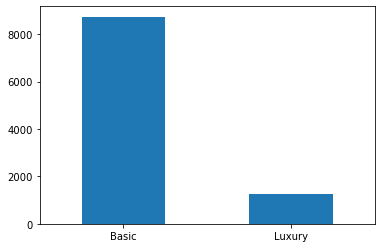

In [6]:
# category 빈도수 시각화
df["category"].value_counts().plot(kind="bar", rot=0)

In [7]:
# category 빈도수
df["category"].value_counts()

Basic     8735
Luxury    1265
Name: category, dtype: int64

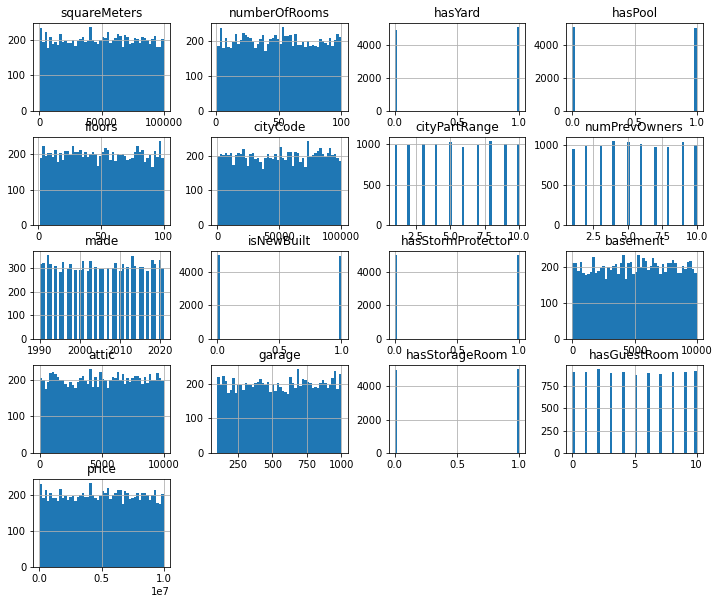

In [8]:
# hist
_ = df.hist(bins=50, figsize=(12,10))

Text(0.5, 1.0, 'Yard')

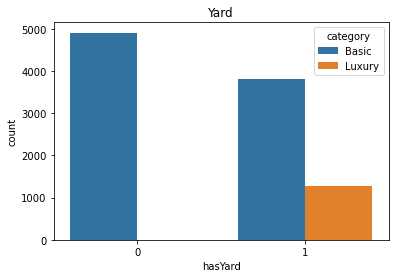

In [9]:
# 마당 유무별 category 빈도 시각화
sns.countplot(x="hasYard", hue="category", data=df)
plt.title("Yard")

Text(0.5, 1.0, 'Pool')

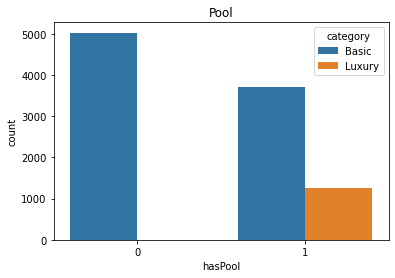

In [10]:
# 수영장 유무별 category 빈도 시각화
sns.countplot(x="hasPool", hue="category", data=df)
plt.title("Pool")

Text(0.5, 1.0, 'City Part Range')

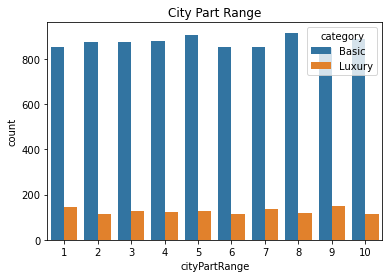

In [11]:
# city part range 별 category 빈도 시각화
sns.countplot(x="cityPartRange", hue="category", data=df)
plt.title("City Part Range")

Text(0.5, 1.0, 'Previous Owners')

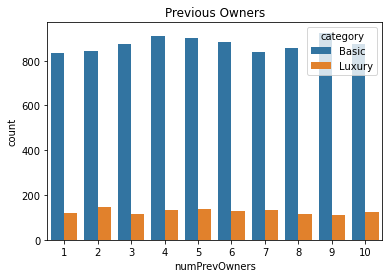

In [12]:
# 이전 주인수별 category 빈도 시각화
sns.countplot(x="numPrevOwners", hue="category", data=df)
plt.title("Previous Owners")

Text(0.5, 1.0, 'new built')

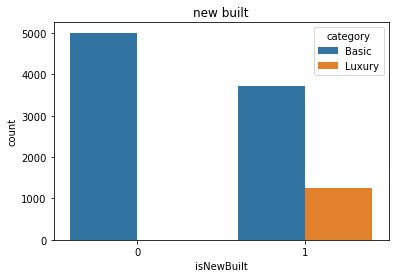

In [13]:
# new built 유무 별 category 빈도시각화
sns.countplot(x="isNewBuilt", hue="category", data=df)
plt.title("new built")

Text(0.5, 1.0, 'storm protector')

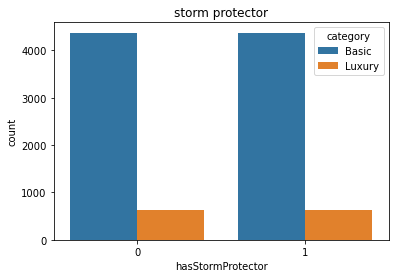

In [14]:
# storm protector 보유 여부별 category 빈도 시각화
sns.countplot(x="hasStormProtector", hue="category", data=df)
plt.title("storm protector")

Text(0.5, 1.0, 'storage room')

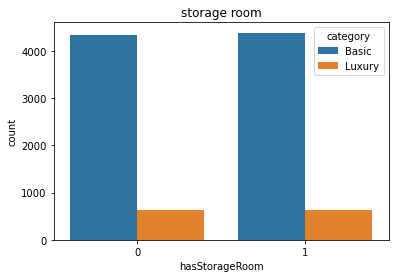

In [15]:
# storage 유무별 category 빈도 시각화
sns.countplot(x="hasStorageRoom", hue="category", data=df)
plt.title("storage room")

Text(0.5, 1.0, 'Guestroom')

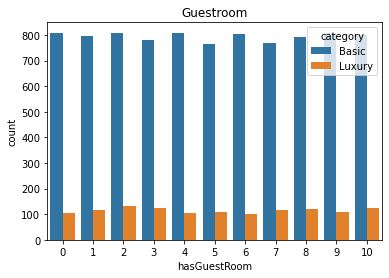

In [16]:
# guest room 유무별 category 빈도 시각화
sns.countplot(x="hasGuestRoom", hue="category", data=df)
plt.title("Guestroom")

In [17]:
df["hasGuestRoom"].value_counts()

2     942
10    926
9     916
0     914
8     913
4     911
1     910
3     906
6     904
7     884
5     874
Name: hasGuestRoom, dtype: int64

In [18]:
# 결측치 확인
df.isnull().sum().sum()

0

In [19]:
# 중복 확인
df.duplicated().sum()

0

## feature engineering

In [20]:
# feature engineering
# squareMeters, basement, price -> minmaxscaling
# category -> encoding

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline

scaler = MinMaxScaler(feature_range=(0,1))
encoder = LabelEncoder()

class data_transform(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(x,y):
        return self
    def transform(self, x):
        x.squareMeters = scaler.fit_transform(np.array(x.squareMeters).reshape(-1,1))
        x.basement = scaler.fit_transform(np.array(x.basement).reshape(-1,1))
        x.price = scaler.fit_transform(np.array(x.price).reshape(-1,1))
        x.category = encoder.fit_transform(x.category)
        return x
    
data_pipeline = Pipeline([("data pipeline", data_transform())])
data_pipeline


Pipeline(steps=[('data pipeline', data_transform())])

In [21]:
df = data_pipeline.transform(df)
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,0.755020,3,0,1,63,9373,3,8,2005,0,1,0.4313,9005,956,0,7,0.755144,0
1,0.807547,39,1,1,98,39381,8,6,2015,1,0,0.3653,2436,128,1,2,0.807854,1
2,0.556731,58,0,1,19,34457,6,8,2021,0,0,0.2937,8852,135,1,9,0.556630,0
3,0.322560,47,0,0,6,27939,10,4,2012,0,1,0.0659,7141,359,0,3,0.322339,0
4,0.704034,19,1,1,90,38045,3,7,1990,1,0,0.8435,2429,292,1,4,0.704723,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.016385,89,0,1,5,73133,7,6,2009,0,1,0.9311,1698,218,0,4,0.016617,0
9996,0.443539,29,1,1,12,34606,9,4,1990,0,1,0.9061,1742,230,0,0,0.443973,0
9997,0.838274,3,0,0,69,80933,10,10,2005,1,1,0.8304,7730,345,1,9,0.838269,0
9998,0.590001,70,0,0,96,55856,1,3,2010,0,1,0.2590,6174,339,1,4,0.589688,0


In [22]:
# 상관계수
corr = df.corr()

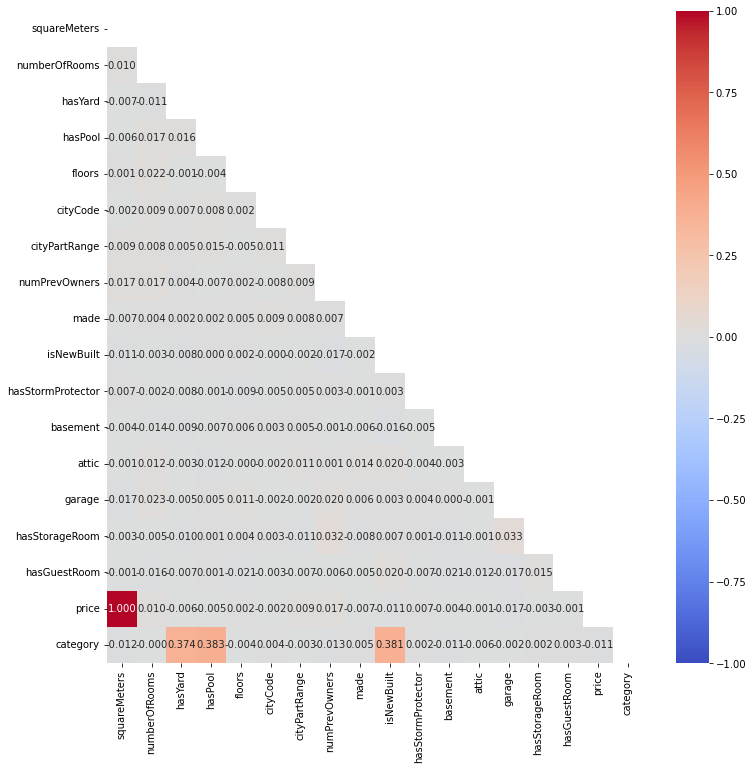

In [23]:
# 변수간 상관관계 파악
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(12,12))
_ = sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask, fmt=".3f", vmax=1, vmin=-1)

## Modeling

### 데이터셋 나누기

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(k_neighbors=2)

train = df.drop("category", axis=1)
target = df.category

display(train.shape)
display(target.shape)

(10000, 17)

(10000,)

In [25]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 17) (3000, 17) (7000,) (3000,)


0    0.872571
1    0.127429
Name: category, dtype: float64

0    6108
1     892
Name: category, dtype: int64

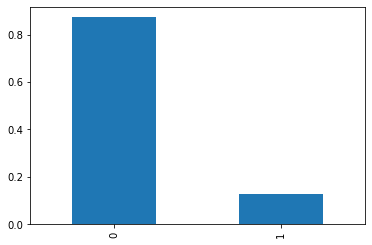

In [26]:
# y_train target 비율 시각화
y_train.value_counts(normalize=True).plot(kind="bar")
display(y_train.value_counts(normalize=True))
display(y_train.value_counts())

In [27]:
# 오버샘플링
X_train_over, y_train_over = smote.fit_resample(X_train,y_train)
print(X_train_over.shape,y_train_over.shape)

(12216, 17) (12216,)


0    0.5
1    0.5
Name: category, dtype: float64


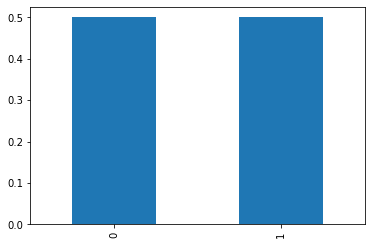

In [28]:
# 오버샘플링 한 뒤 target 값 비율 확인
y_train_over.value_counts(normalize=True).plot(kind="bar")
print(y_train_over.value_counts(normalize=True))

In [29]:
input_shape = len(X_train.keys())
input_shape

17

### 모델 생성

In [30]:
# 모델 생성
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu', input_shape=[input_shape]),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),         
])
model

2022-07-10 18:21:23.805428: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
# 모델 컴파일
model.compile(optimizer="adam",
              loss="binary_crossentropy",
             metrics=["accuracy"])

In [32]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4608      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1

### 모델 학습

In [33]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 ==0: print('')
        print(".", end="")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

In [34]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2,
                    callbacks=[early_stop, PrintDot()], verbose=0)
history


........................

In [35]:
# loss, accuracy, val_loss, val_accuracy
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
19,0.389649,0.870357,0.364760,0.880714
20,0.401033,0.870000,0.364463,0.880714
21,0.396922,0.870179,0.363813,0.882143
22,0.428954,0.870179,0.367158,0.880714
23,0.393355,0.870357,0.366972,0.880714


### 학습 결과 시각화

<AxesSubplot:>

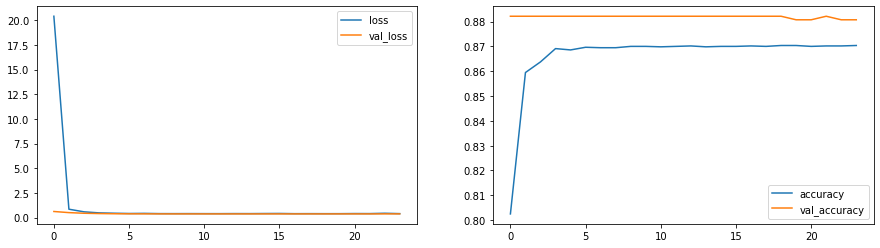

In [36]:
# loss, accuracy 값 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
df_hist[["loss", "val_loss"]].plot(ax=axes[0])
df_hist[["accuracy", "val_accuracy"]].plot(ax=axes[1])

## 예측

In [37]:
# 예측값
y_pred = model.predict(X_test).flatten()
y_pred.shape

94/94 [==============================] - 0s 1ms/step


(3000,)

In [38]:
# 임계값:0.5
y_predict = (y_pred > 0.5).astype(int)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
# 테스트 정확도
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\ntest_acc: ", test_acc)
print("\ntest_loss: ", test_loss)

94/94 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8753

test_acc:  0.875333309173584

test_loss:  0.3771885633468628
